<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/main/help/notebooks/prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=https://github.com/giordamaug/HELP/blob/main/help/notebooks/prediction.ipynb">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

# Install HELP from GitHub
Skip this cell if you already have installed HELP.

In [ ]:
!pip install git+https://github.com/giordamaug/HELP.git

# Download the input files
In this cell we download from GitHub repository the label file and the attribute files. Skip this step if you already have these input files locally.

In [ ]:
tissue='Kidney'
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/{tissue}_HELP.csv
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/{tissue}_BIO.csv
for i in range(5):
  !wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/{tissue}_CCcfs_{i}.csv
!wget https://raw.githubusercontent.com/giordamaug/HELP/main/help/datafinal/{tissue}_EmbN2V_128.csv

In [2]:
%cd ../datafinal

/Users/maurizio/HELP/help/datafinal


# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [142]:
tissue='Kidney'
import pandas as pd
from help.preprocess.loaders import feature_assemble_df
import os
df_y = pd.read_csv(f"{tissue}_HELP.csv", index_col=0)
df_y = df_y.replace({'aE': 'NE', 'sNE': 'NE'})
print(df_y.value_counts(normalize=False))
features = [{'fname': f'{tissue}_BIO.csv', 'fixna' : False, 'normalize': 'std'},
            {'fname': f'{tissue}_CCcfs.csv', 'fixna' : False, 'normalize': 'std', 'nchunks' : 5},
            {'fname': f'{tissue}_EmbN2V_128.csv', 'fixna' : False, 'normalize': None}]
df_X, df_y = feature_assemble_df(df_y, features=features, subsample=False, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

label
NE       16678
E         1253
Name: count, dtype: int64
Majority NE 16678 minority E 1253
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...
17236 labeled genes over a total of 17931
(17236, 3456) data input


,Gene length,Transcripts count,GC content,GTEX_kidney,Gene-Disease association,OncoDB_expression,HPA_kidney,GO-MF,GO-BP,GO-CC,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1BG,0.003351,0.020942,0.501832,2.044542e-05,0.002950,NaN,0.000002,NaN,NaN,0.115385,...,0.120922,-0.352630,0.580697,-0.659300,-1.320486,1.019308,-0.469064,0.123211,0.557266,NE
A1CF,0.034865,0.047120,0.160530,1.980884e-05,NaN,0.556939,0.000232,0.069767,0.041026,0.096154,...,-1.162494,0.155702,-1.162071,0.534082,0.798872,0.149595,-0.360515,-1.060540,-0.408493,NE
A2M,0.019624,0.062827,0.176932,3.377232e-03,0.073746,0.584540,0.005382,0.302326,0.056410,0.076923,...,0.150766,1.492019,0.209449,-1.034729,-0.064318,0.029690,0.138344,0.806095,-0.496128,NE
A2ML1,0.026017,0.041885,0.299948,5.123403e-07,0.017699,NaN,0.000000,0.069767,0.005128,0.038462,...,0.191344,-0.542462,0.746510,0.082089,-1.109212,0.406936,-1.332319,-0.363864,0.443284,NE
A3GALT2,0.005784,0.000000,0.473739,1.421472e-06,NaN,0.663540,0.000000,0.069767,0.015385,0.057692,...,0.483003,-0.197605,0.164332,0.040729,-0.552362,0.242761,0.223486,0.017539,-0.526580,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.021209,0.010471,0.288257,7.073108e-06,NaN,0.634761,0.000055,NaN,NaN,0.000000,...,-0.717935,-0.072597,0.585837,0.172081,-0.278010,0.170799,0.267462,-0.211294,-0.940943,NE
ZYG11B,0.040775,0.005236,0.248648,7.271294e-05,NaN,0.646090,0.000238,0.000000,0.005128,0.000000,...,0.372134,0.007040,-0.278071,-1.309595,-0.352476,0.732887,0.156505,0.516706,-0.412953,NE
ZYX,0.003958,0.047120,0.539522,8.282866e-04,NaN,0.672638,0.000177,0.046512,0.035897,0.153846,...,-0.316321,-0.382132,0.400354,0.322564,0.400369,0.188850,0.593201,-0.093008,-0.508902,NE
ZZEF1,0.056017,0.052356,0.304484,9.626291e-05,NaN,NaN,0.000121,0.093023,NaN,NaN,...,-0.520060,-0.000595,-0.101278,-0.468345,0.240905,-0.124018,0.568793,-0.422793,-0.701705,NE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then we store predictions and print metrics.

{'E': 0, 'NE': 1}
label
NE       15994
E         1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:29<00:00,  5.97s/it]


,measure
ROC-AUC,0.9558±0.0045
Accuracy,0.9488±0.0041
BA,0.8324±0.0156
Sensitivity,0.6964±0.0317
Specificity,0.9684±0.0041
MCC,0.6357±0.0258
CM,"[[865, 377], [506, 15488]]"


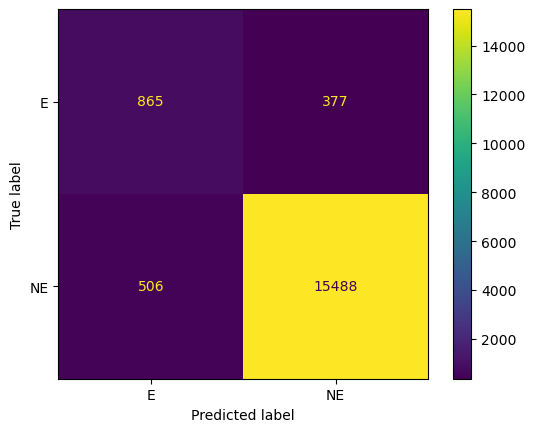

In [5]:
from help.models.prediction import predict_cv
df_scores_means, df_scores, predictions = predict_cv(df_X, df_y, n_splits=5, method='LGBM', balanced=True, display=True, verbose=True, saveflag=True, outfile=f'pred_{tissue}.csv')
df_scores_means

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Majority NE 16678 minority E 1253
Subsampling with factor 1:4
[Kidney_BIO.csv] found 52532 Nan...
[Kidney_BIO.csv] Normalization with std ...


Loading file in chunks: 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]


[Kidney_CCcfs.csv] found 6676644 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] found 0 Nan...
[Kidney_EmbN2V_128.csv] No normalization...
6033 labeled genes over a total of 6265
(6033, 3456) data input
{'E': 0, 'NE': 1}
label
NE       4791
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]


,measure
ROC-AUC,0.9561±0.0036
Accuracy,0.9158±0.0083
BA,0.8683±0.0065
Sensitivity,0.7874±0.0150
Specificity,0.9491±0.0120
MCC,0.7416±0.0203
CM,"[[978, 264], [244, 4547]]"


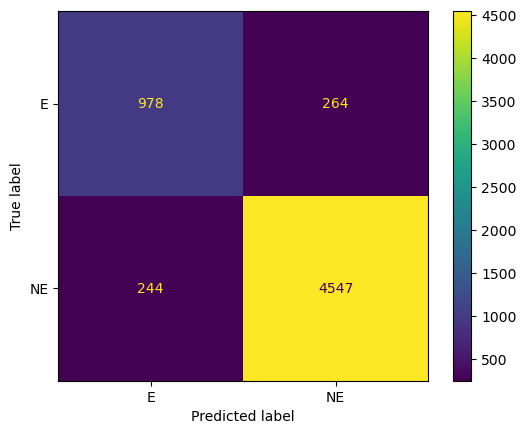

In [139]:
df_y = pd.read_csv(f"{tissue}_HELP.csv", index_col=0)
df_y = df_y.replace({'aE': 'NE', 'sNE': 'NE'})
df_X, df_y = feature_assemble_df(df_y,features=features, subsample=True, fold=4, seed=1, verbose=True)
df_scores_means, df_scores, predictions = predict_cv(df_X, df_y, n_splits=5, method='LGBM', balanced=True, display=True, verbose=True, saveflag=True, outfile=f'pred_{tissue}_sub.csv')
df_scores_means

In [6]:
predictions

,label,prediction,probabilities
gene,,,
A2M,1,1,0.009510
A2ML1,1,1,0.000273
A4GNT,1,1,0.001614
AAAS,1,0,0.757293
AACS,1,1,0.009432
...,...,...,...
ZSCAN9,1,1,0.001023
ZSWIM6,1,1,0.001135
ZUP1,1,1,0.026474


In [18]:
predictions[predictions['prediction']==0]

,label,prediction,probabilities
gene,,,
ZW10,1,0,0.986503
RSF1,1,0,0.949895
PARN,1,0,0.736945
MED10,1,0,0.970340
HSF1,1,0,0.518002
...,...,...,...
MYDGF,1,0,0.534282
SRSF4,1,0,0.737573
KNTC1,1,0,0.948684


In [147]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import numpy as np
df_y_ne = df_y[df_y['label']=='NE']
df_y_e = df_y[df_y['label']=='E']
#df_y_ne = df_y_ne.sample(frac=1)
n_voters = 10
splits = np.array_split(df_y_ne, n_voters) 
predictions_ne = pd.DataFrame()
predictions_e = pd.DataFrame(index=df_y_e.index)
d=np.empty((len(df_y_e.index),),object)
d[...]=[list() for _ in range(len(df_y_e.index))]
predictions_e['probabilities'] = d
predictions_e['label'] = np.array([0 for idx in df_y_e.index])
predictions_e['prediction'] = np.array([np.nan for idx in df_y_e.index])
for df_index_ne in splits:
    df_x = pd.concat([df_X.loc[df_index_ne.index], df_X.loc[df_y_e.index]])
    df_yy = pd.concat([df_y.loc[df_index_ne.index], df_y_e])
    _, _, preds = predict_cv(df_x, df_yy, n_splits=5, method='LGBM', balanced=True, verbose=True)
    predictions_ne = pd.concat([predictions_ne, preds.loc[df_index_ne.index]])
    r = np.empty((len(df_y_e.index),),object)
    r[...]=[predictions_e.loc[idx]['probabilities'] + [preds.loc[idx]['probabilities']]  for idx in df_y_e.index]
    predictions_e['probabilities'] = r
predictions_e['prediction'] = predictions_e['probabilities'].map(lambda x: 0 if sum(x)/n_voters > 0.5 else 1)
predictions_e['probabilities'] = predictions_e['probabilities'].map(lambda x: sum(x)/n_voters)
pd.concat([predictions_ne, predictions_e]).to_csv(f"pred_Kidney_SV_{n_voters}.csv", index=True)

/Users/maurizio/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:16<00:00,  3.25s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]


{'E': 0, 'NE': 1}
label
NE       1600
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:16<00:00,  3.22s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.93s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:14<00:00,  2.81s/it]


{'E': 0, 'NE': 1}
label
NE       1599
E        1242
Name: count, dtype: int64
Classification with LGBM...


5-fold: 100%|██████████| 5/5 [00:13<00:00,  2.66s/it]


In [113]:
predictions_e.to_csv("pred_Kidney_SV.csv", index=True)